<h1> Day 28 - Class </h1>

## Improving Algorithms

Last class we saw that we can employee different techniques for improving the model accuracy (e.g. blending , boosting etc). We keep track of the model metrics (accuracy, tn, fn , etc etc) for each model and pick the one that's performing the best. For competitions, however this will not be good enough. We have to see approaches like blending to make a better algorithm.

### Choose best hyperparameters with GridSearchCV

Grid search is the process of performing hyper parameter tuning in order to determine the optimal values for a given model. This is significant as the performance of the entire model is based on the hyper parameter values specified.

A cross validation process is performed in order to determine the hyper parameter value set which provides the best accuracy levels.

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.random.randint(1,100,(100,5))
y = np.random.randint(0,2,(100))

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)


In [12]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state = 42)

params_grid = { 'max_depth' : [3,None],
		'min_samples_split' : [2,3,10],
		'min_samples_leaf':[1,3,10],
		'bootstrap':[True,False],
		'criterion':['gini','entropy']}

grid_search = GridSearchCV(rf_clf,params_grid,n_jobs=-1,cv=5,verbose=1,scoring='accuracy')

grid_search.fit(X_train,y_train)

grid_search.best_score_

grid_search.best_estimator_.get_params()

#print_score(grid_search, X_train, y_train, X_test, y_test, train=True)

#print_score(grid_search, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   13.0s finished


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

### Model Validation

Generally, an error estimation for the model is made after training, better known as evaluation of residuals. In this process, a numerical estimate of the difference in predicted and original responses is done, also called the training error. However, this only gives us an idea about how well our model does on data used to train it. Now its possible that the model is underfitting or overfitting the data. So, the problem with this evaluation technique is that it does not give an indication of how well the learner will generalize to an independent/ unseen data set. Getting this idea about our model is known as Cross Validation.

#### Holdout Method

Now a basic remedy for this involves removing a part of the training data and using it to get predictions from the model trained on rest of the data. The error estimation then tells how our model is doing on unseen data or the validation set. This is a simple kind of cross validation technique, also known as the holdout method. Although this method doesn’t take any overhead to compute and is better than traditional validation, it still suffers from issues of high variance. This is because it is not certain which data points will end up in the validation set and the result might be entirely different for different sets.

#### K-Fold Cross Validation

As there is never enough data to train your model, removing a part of it for validation poses a problem of underfitting. By reducing the training data, we risk losing important patterns/ trends in data set, which in turn increases error induced by bias. So, what we require is a method that provides ample data for training the model and also leaves ample data for validation. K Fold cross validation does exactly that.

In K Fold cross validation, the data is divided into k subsets. Now the holdout method is repeated k times, such that each time, one of the k subsets is used as the test set/ validation set and the other k-1 subsets are put together to form a training set. The error estimation is averaged over all k trials to get total effectiveness of our model. As can be seen, every data point gets to be in a validation set exactly once, and gets to be in a training set k-1 times. This significantly reduces bias as we are using most of the data for fitting, and also significantly reduces variance as most of the data is also being used in validation set. Interchanging the training and test sets also adds to the effectiveness of this method. As a general rule and empirical evidence, K = 5 or 10 is generally preferred, but nothing’s fixed and it can take any value.

#### Stratified K-Fold Cross Validation

In some cases, there may be a large imbalance in the response variables. For example, in dataset concerning price of houses, there might be large number of houses having high price. Or in case of classification, there might be several times more negative samples than positive samples. For such problems, a slight variation in the K Fold cross validation technique is made, such that each fold contains approximately the same percentage of samples of each target class as the complete set, or in case of prediction problems, the mean response value is approximately equal in all the folds. This variation is also known as Stratified K Fold.

#### How it works ?
Run cross fold validation and see how model is performing for each data splits. If the model is performing with more or less same level of accuracies across multiple splits, then that's a good model

See the below example, cv = 10 for a datasize of 500 records means each split has 50 records and we run the train on 9 samples and test on remaining 1 sample and so on for each split

In [13]:
from sklearn.model_selection import cross_val_score
cross_val_score(rf_clf,X,y,cv=10)

array([0.4, 0.4, 0.5, 0.6, 0.5, 0.4, 0.5, 0.2, 0.7, 0.4])

### Blending

There are different types of blending. One of them is explained in the previous class. The other type is explained below,

- We train the model on 'n' algorithms
- We take the average predictions of each algorithm and give that as the prediction

### Model Building steps

- Model Building
    - Machine Learning Models
    - Accuracy Score and hyper-parameter tuning
    - Single model which give you highest accuracy is chosen
    - deploy and we use this for prediction

- Advanced users/kaggle competition
    - Stacking models
    - boosting
    - use this models for predicting the feature observations
    - trade-off between interpretability - accuracy (complex techniques such as stacking gives better accuracy but interpretability is lost)
    - gridsearch
    - Find optimized parameters for each algorithms
    - stacking or boosting algorithms
    - check for accuracy
    - k-fold validation
    - submit prediction once you have k fold validation values in similar ranges

### Feature Engineering

While we develop a model we have to select the features(predictors) that helps the most in predicting/classifying the y-variable. The technique to achieve this is called 'feature engineering'. We try to select the most important features and as well try to see if we can make the insignificant features as significant by applying some techniques


1) Feature Importance - You can objectively estimate the usefulness of features.

2) Feature Extraction - is a process of automatically reducing the dimensionality of these types of observations into a much smaller set that can be modelled.
- PCA

3) Feature Selection - addresses these problems by automatically selecting a subset that are most useful to the problem.
- correlation
- forward selection
- backward elimination
- stepwise selection
- L1/L2 regularisation

4) Feature Construction

#### Topics
- Feature Engineering
- Forward Selection
- Backward Elimination
- Stepwise Selection
- Lowvariance Method
- PCA (Principal Component Analysis)
- LDA (Linear Discriminant Analysis)
- TSNE (T Student Neighbourhood Embedding)

Objective - 
Identify the imporant columns using 
- forward selection


    Step 1

    The first step is very similar to that of backward elimination. Here, we select a significance level, or a P-value. And as you already know, significance level of 5%, or a P-value of 0.05 is common. So let’s stick with that.
    
    Step 2

    This is a pretty tedious step. In this second step, we create a simple regression model for each feature we have in our dataset. So if there are 100 features, we create 100 simple linear regression models. So this could get a lot boring and complicated depending on the number of features in your dataset. But this is also one of the most import step in the process. And once we fit all the simple linear regression models, we calculate the P-value for all of them and identify the feature with the lowest P-value.
    
    Step 3

    In the previous step, we identified the feature with the lowest P-value. We’ll add that feature to the simple linear regression models of all other features. So in the second step, we had simple regression models with one feature each. In this step, we’ll have one less linear regression model, but each of them will have two features. Once we do this, we’ll fit the models again and calculate the P-values.
    
    Step 4

    In this step, we have the P-values of all the models we created in the previous step. We identify the feature with the lowest P-value again. We check if this lowest P-value is less than the significance level, or 0.05 in our example. If so, we’ll take that new feature and add it as a feature to all other models. So basically, we’re repeating step 3 with a new feature. We’ll continue this loop until the lowest P-value we get from a model is no longer less than the significance level. Once we reach this stage, we break the loop.

- backward elimination
<img src='img/backward-selection-01.png'/>
- stepwise selection
- lowvariance method

Convert insignificant to significant
- PCA (Principal Component Analysis)
- LDA (Linear Discriminant Analysis)
- TSNE (T Student Neighbour Embedding)
- Transformations


#### Techniques
<b>Drop missing data rows/columns</b>

When there is a lot of missing data, then drop those rows/columns. There is not an optimum threshold for dropping but you can use 70% as an example value and try to drop the rows and columns which have missing values with higher than this threshold.

<b>Imputation</b>

When there is a lot of missing value , you can choose to fill them with an 'ideal' value. Ideal value could be,

0 or median of the feature, it varies b/w use cases. Median is not sensitive to outliers, whereas mean is sensitive to outlier.

Replacing the missing values with the maximum occurred value in a column is a good option for handling categorical columns. But if you think the values in the column are distributed uniformly and there is not a dominant value, imputing a category like “Other” might be more sensible, because in such a case, your imputation is likely to converge a random selection.

<b>Outlier handling</b>

Limit to plus/minus 3 standard deviations 

Or 

Use Z-scores

Or

Use quantiles

<b>Binning</b>
<pre>
#Numerical Binning Example

Value  -> Bin
0-30   ->  Low       
31-70  ->  Mid       
71-100 ->  High

#Categorical Binning Example
Value  ->  Bin       
Spain  ->  Europe      
Italy  ->  Europe       
Chile  ->  South America
Brazil ->  South America
</pre>

The trade-off between performance and overfitting is the key point of the binning process. In my opinion, for numerical columns, except for some obvious overfitting cases, binning might be redundant for some kind of algorithms, due to its effect on model performance. Thus, assigning a general category to these less frequent values helps to keep the robustness of the model. For example, if your data size is 100,000 rows, it might be a good option to unite the labels with a count less than 100 to a new category like “Other”.


<b> Log transormations </b>

<b> Normalisation </b>

### Dimensionality Reduction
Having a large number of dimensions in the feature space can mean that the volume of that space is very large, and in turn, the points that we have in that space (rows of data) often represent a small and non-representative sample.

This can dramatically impact the performance of machine learning algorithms fit on data with many input features, generally referred to as the “curse of dimensionality.”

#### Principal Component Analysis (PCA)

Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

PCA is an unsupervised machine learning method that is used for dimensionality reduction. The main idea of principal component analysis (PCA) is to reduce the dimensionality of a data set consisting of many variables correlated with each other, either heavily or lightly, while retaining the variation present in the dataset, up to the maximum extent.

In [14]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

genes = ['gene' + str(i) for i in range (1,101)]
wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range(1,6)]
data = pd.DataFrame(columns = [*wt, *ko], index = genes)

for gene in data.index:
    data.loc[gene,'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
    data.loc[gene,'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
data

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,793,805,765,826,811,923,948,907,906,964
gene2,103,127,131,124,115,462,514,421,493,487
gene3,88,83,78,83,75,295,302,317,293,318
gene4,298,332,292,310,301,830,819,862,823,865
gene5,763,756,768,742,769,853,814,862,840,778
...,...,...,...,...,...,...,...,...,...,...
gene96,691,681,719,684,727,533,529,554,564,555
gene97,516,542,569,538,514,551,541,527,537,566
gene98,536,507,517,506,511,863,853,848,842,932
gene99,164,159,198,185,179,801,722,713,747,738


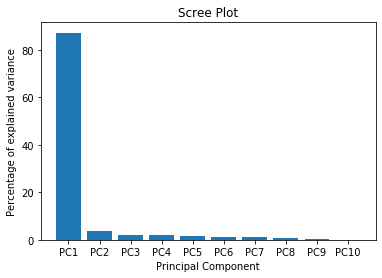

In [19]:
scaled_data = preprocessing.scale(data.T)
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)
labels = ['PC' + str(x) for x in range(1,len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height = per_var, tick_label=labels)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

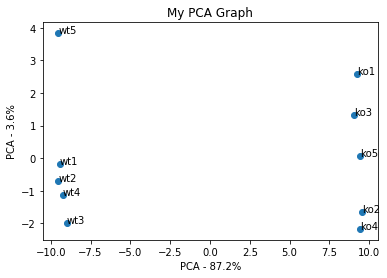

In [20]:
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns = labels)
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')

plt.xlabel('PCA - {0}%'.format(per_var[0]))
plt.ylabel('PCA - {0}%'.format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
plt.show()

In [23]:
loading_scores = pd.Series(pca.components_[0],index=genes)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_10_genes = sorted_loading_scores[0:10].index.values
print(loading_scores[top_10_genes])

gene39    0.107057
gene86    0.107037
gene30   -0.107034
gene18    0.107025
gene60   -0.107015
gene85   -0.106994
gene54    0.106990
gene20   -0.106958
gene79    0.106955
gene62    0.106954
dtype: float64


#### Linear Discriminant Analysis(LDA)
Linear Discriminant Analysis, or LDA, is a linear machine learning algorithm used for multi-class classification.

It should not be confused with “Latent Dirichlet Allocation” (LDA), which is also a dimensionality reduction technique for text documents

Linear Discriminant Analysis seeks to best separate (or discriminate) the samples in the training dataset by their class value. Specifically, the model seeks to find a linear combination of input variables that achieves the maximum separation for samples between classes (class centroids or means) and the minimum separation of samples within each class.

>1 0.182 (0.032)
>2 0.235 (0.036)
>3 0.267 (0.038)
>4 0.303 (0.037)
>5 0.314 (0.049)
>6 0.314 (0.040)
>7 0.329 (0.042)
>8 0.343 (0.045)
>9 0.358 (0.056)


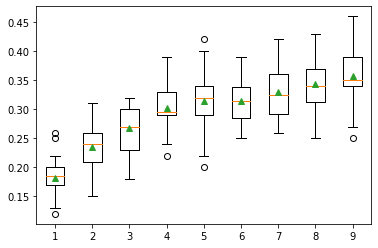

In [4]:
# compare lda number of components with naive bayes algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7, n_classes=10)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(1,10):
		steps = [('lda', LinearDiscriminantAnalysis(n_components=i)), ('m', GaussianNB())]
		models[str(i)] = Pipeline(steps=steps)
	return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

#### What is the difference between LDA and PCA for dimensionality reduction?

Both LDA and PCA are linear transformation techniques: LDA is a supervised whereas PCA is unsupervised – PCA ignores class labels.

We can picture PCA as a technique that finds the directions of maximal variance:
<img src='img/pca-01.png'/>

In contrast to PCA, LDA attempts to find a feature subspace that maximizes class separability (note that LD 2 would be a very bad linear discriminant in the figure above).
<img src='img/lda-01.png'/>

## References

https://towardsdatascience.com/backward-elimination-for-feature-selection-in-machine-learning-c6a3a8f8cef4

https://sebastianraschka.com/faq/docs/lda-vs-pca.html

https://machinelearningmastery.com/linear-discriminant-analysis-for-dimensionality-reduction-in-python/